In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/personality_dataset.csv")

In [3]:
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


In [4]:
# Count missing values per column
df.isnull().sum()


Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

In [5]:
# Descriptive statistics
df.describe()


,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [6]:
# Unique values and counts
for col in df.select_dtypes(include='object'):
    print(f"\n{col} value counts:")
    print(df[col].value_counts())



Stage_fear value counts:
No     1417
Yes    1410
Name: Stage_fear, dtype: int64

Drained_after_socializing value counts:
No     1441
Yes    1407
Name: Drained_after_socializing, dtype: int64

Personality value counts:
Extrovert    1491
Introvert    1409
Name: Personality, dtype: int64


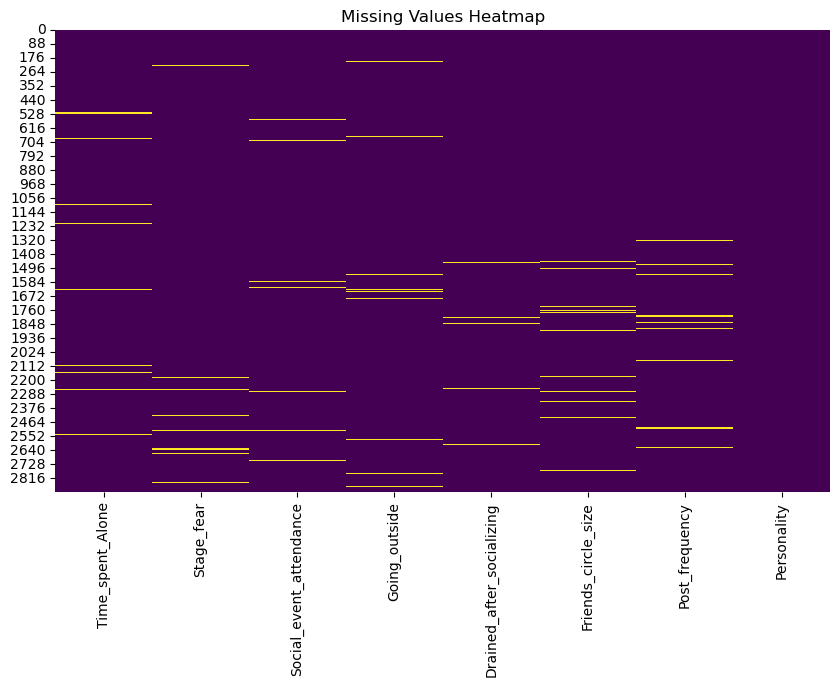

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of missing values
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


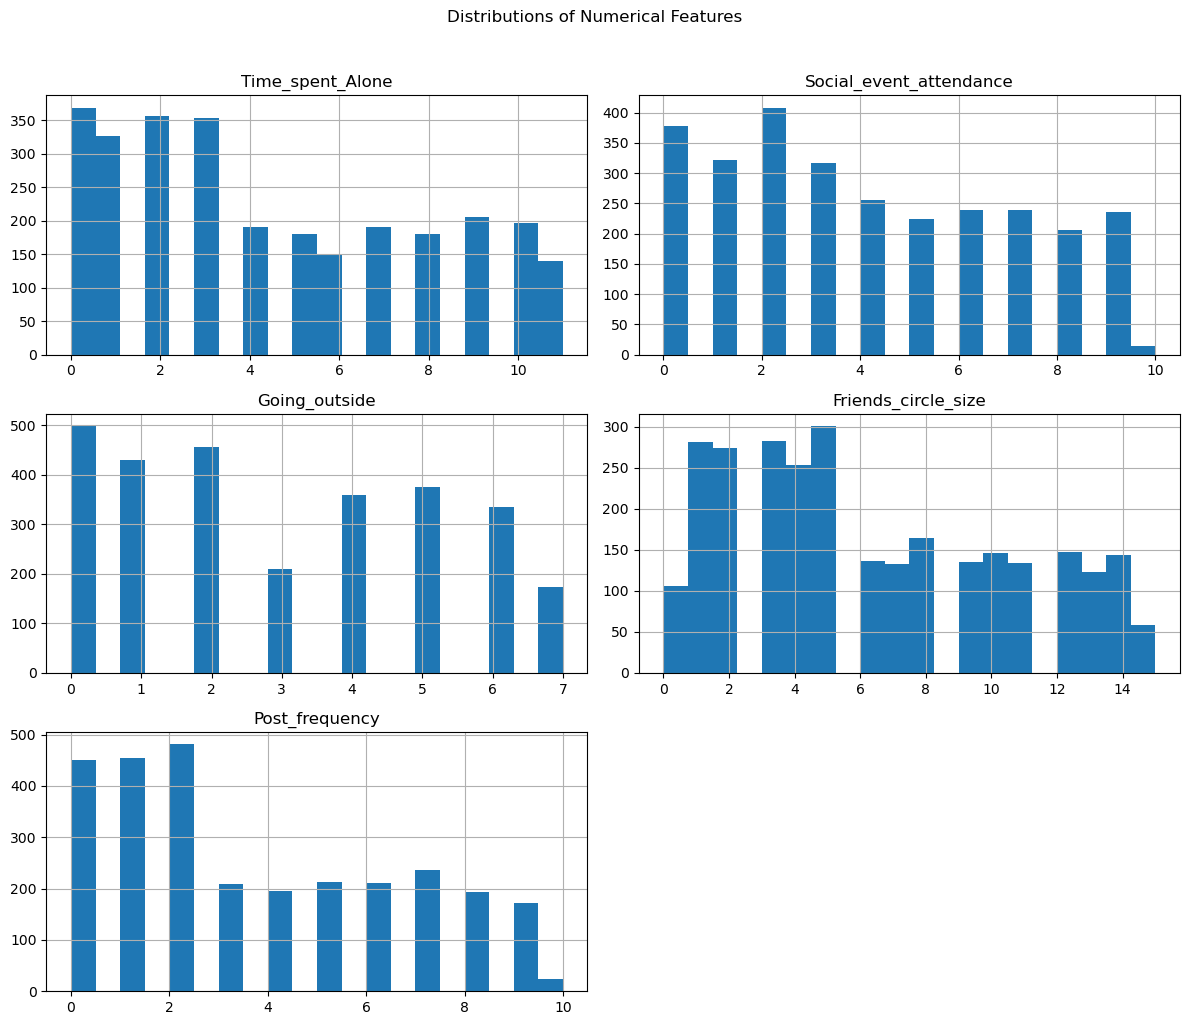

In [8]:
# Histograms for each numeric feature
df.select_dtypes(include='number').hist(figsize=(12,10), bins=20)
plt.suptitle("Distributions of Numerical Features", y=1.02)
plt.tight_layout()
plt.show()


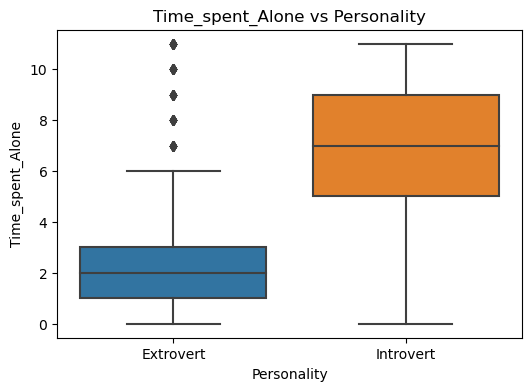

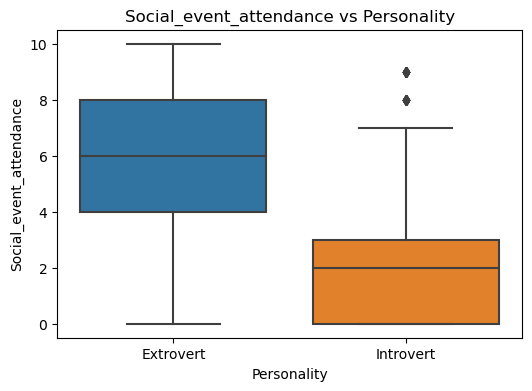

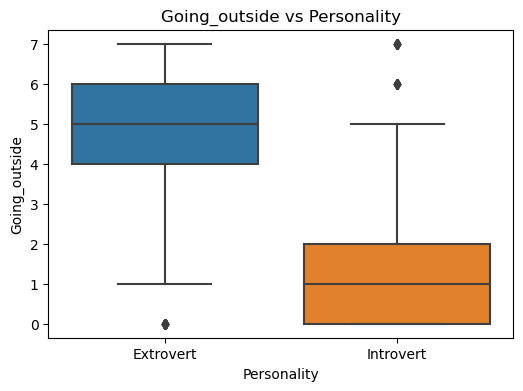

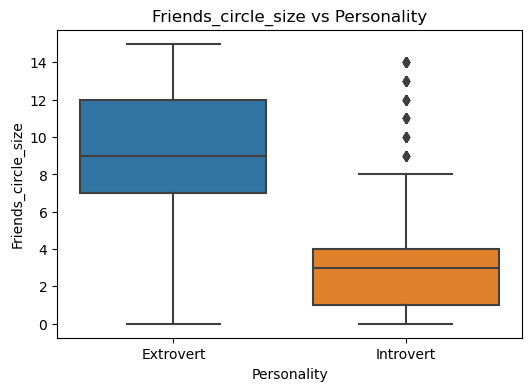

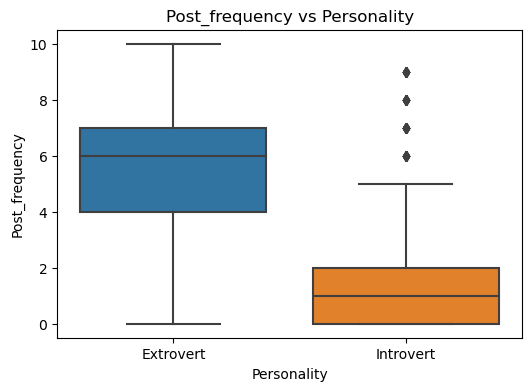

In [9]:
# Boxplots for each numerical feature split by Personality
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Personality', y=col)
    plt.title(f"{col} vs Personality")
    plt.show()


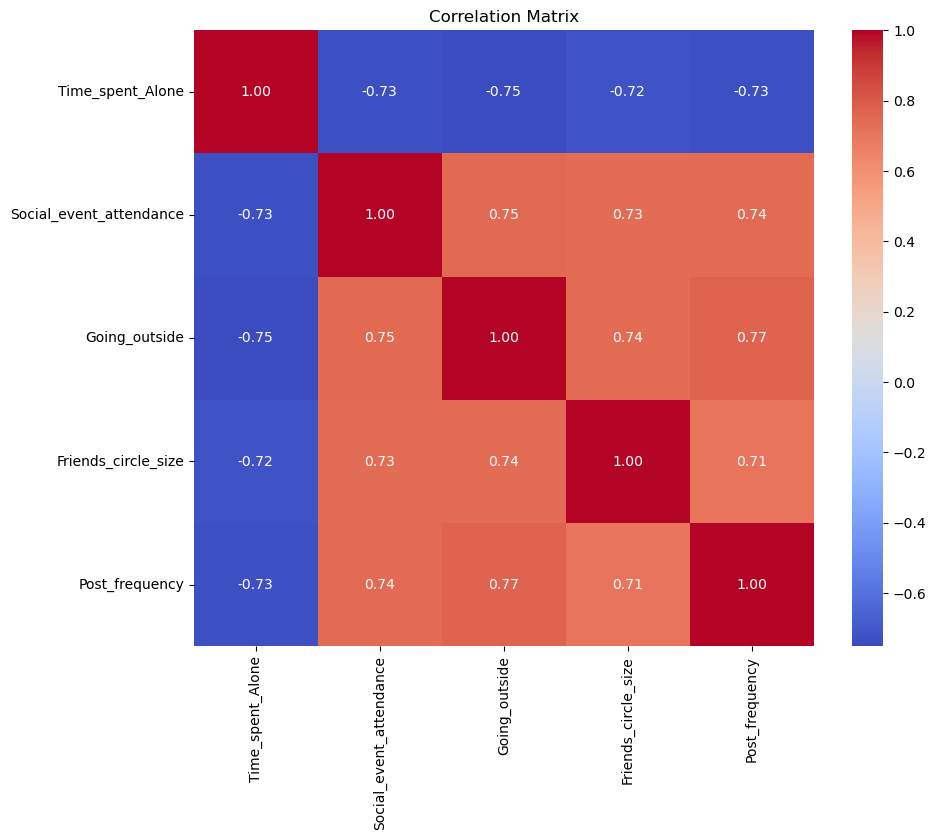

In [10]:
# Compute and plot correlation matrix
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


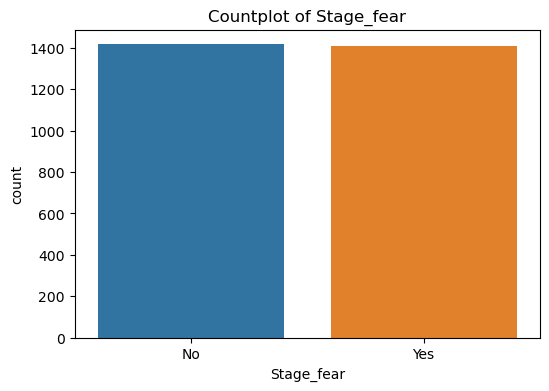

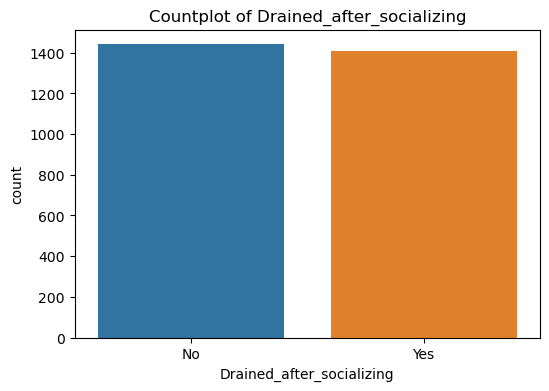

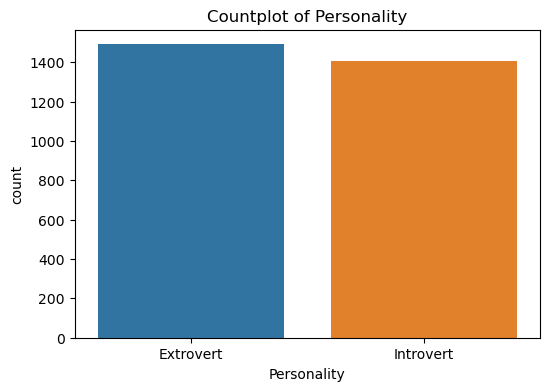

In [11]:
# Countplots of categorical features
categorical_cols = ['Stage_fear', 'Drained_after_socializing', 'Personality']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot of {col}")
    plt.show()


In [12]:
# Option 1: Drop rows with missing values (simplest approach)
df_clean = df.dropna()

# Option 2 (alternative): Fill numeric NaNs with median, categorical with mode
df_clean = df.copy()
for col in df_clean.select_dtypes(include='number'):
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

for col in ['Stage_fear', 'Drained_after_socializing']:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


In [13]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()
le = LabelEncoder()

# Encode binary categorical columns
df_encoded['Stage_fear'] = le.fit_transform(df_encoded['Stage_fear'])  # Yes=1, No=0
df_encoded['Drained_after_socializing'] = le.fit_transform(df_encoded['Drained_after_socializing'])
df_encoded['Personality'] = le.fit_transform(df_encoded['Personality'])  # Extrovert=0, Introvert=1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Define features and target
X = df_encoded.drop('Personality', axis=1)
y = df_encoded['Personality']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.92      0.92       302
           1       0.91      0.92      0.92       278

    accuracy                           0.92       580
   macro avg       0.92      0.92      0.92       580
weighted avg       0.92      0.92      0.92       580

[[277  25]
 [ 21 257]]


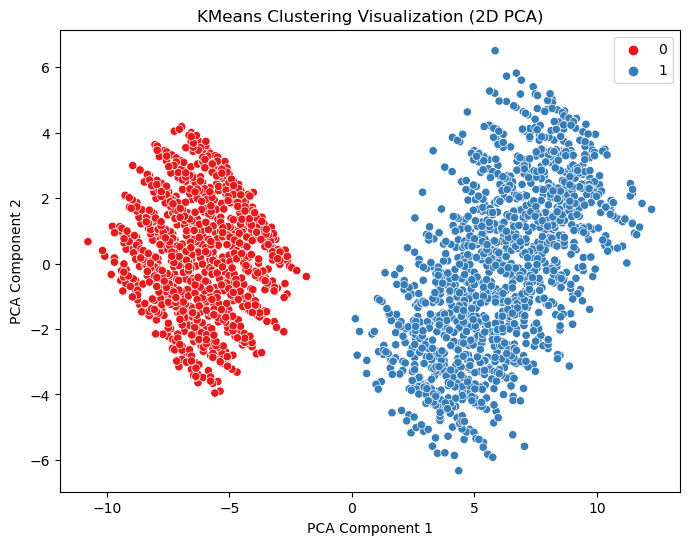

In [15]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Apply KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette='Set1')
plt.title("KMeans Clustering Visualization (2D PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [16]:
from sklearn.metrics import adjusted_rand_score

# How similar are the clusters to actual labels?
ari = adjusted_rand_score(y, clusters)
print(f"Adjusted Rand Index: {ari:.2f}")


Adjusted Rand Index: 0.76


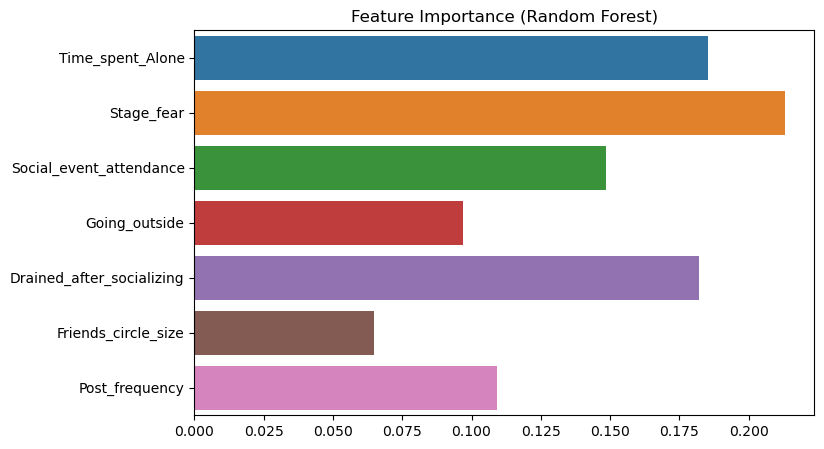

In [17]:
importances = clf.feature_importances_
feature_names = X.columns

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.show()



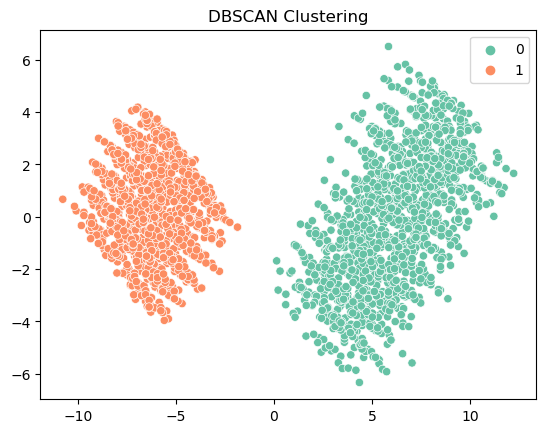

In [18]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2.5, min_samples=5)
db_clusters = dbscan.fit_predict(X)

# Plot results with PCA
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=db_clusters, palette='Set2')
plt.title("DBSCAN Clustering")
plt.show()


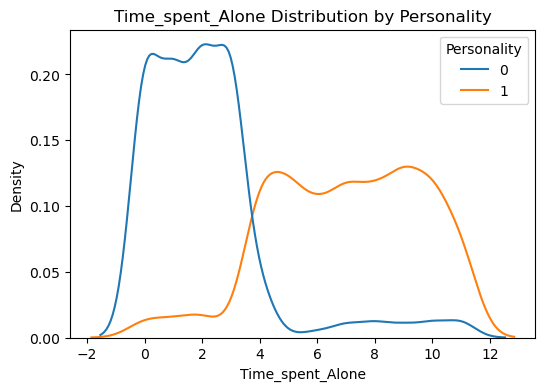

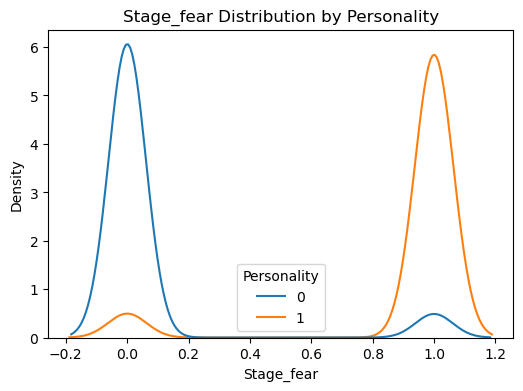

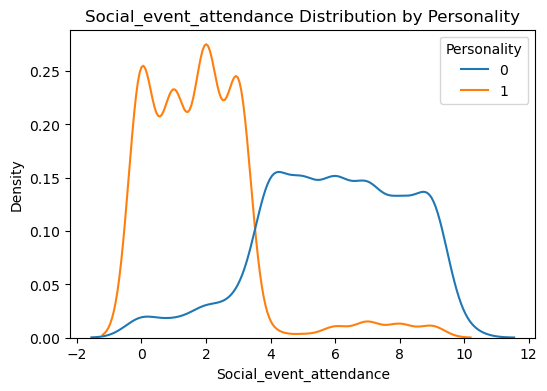

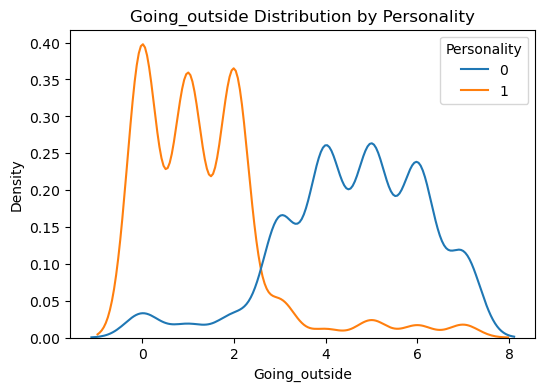

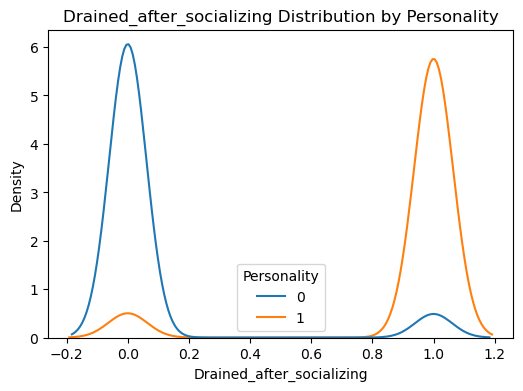

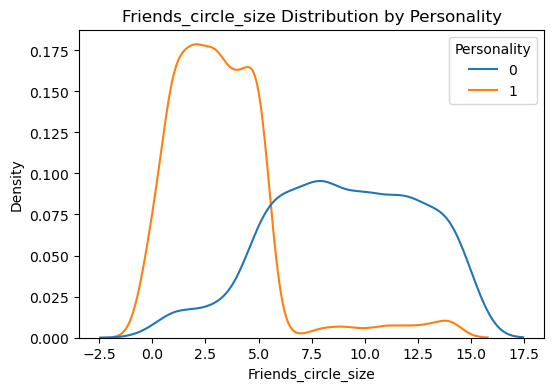

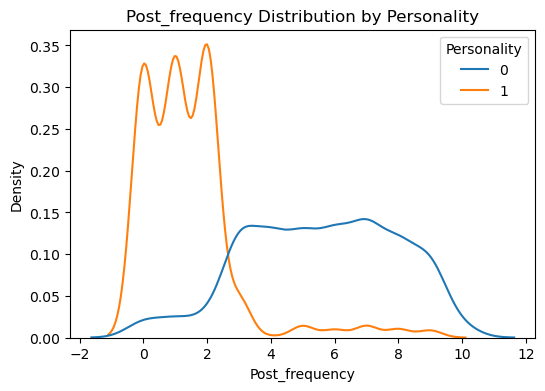

In [19]:
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=df_encoded, x=col, hue='Personality', common_norm=False)
    plt.title(f"{col} Distribution by Personality")
    plt.show()


In [21]:
import joblib

# Save model to file
joblib.dump(clf, "model/personality_rf.pkl")


['model/personality_rf.pkl']

In [22]:
import joblib
import pandas as pd

# Load model
model = joblib.load("model/personality_rf.pkl")

# Example user input
new_data = pd.DataFrame([{
    'Time_spent_Alone': 7.0,
    'Stage_fear': 1,  # Yes = 1, No = 0
    'Social_event_attendance': 2.0,
    'Going_outside': 1.0,
    'Drained_after_socializing': 1,  # Yes = 1
    'Friends_circle_size': 3.0,
    'Post_frequency': 1.0
}])

# Predict
prediction = model.predict(new_data)[0]
personality = "Introvert" if prediction == 1 else "Extrovert"

print(f"Predicted Personality: {personality}")


Predicted Personality: Introvert


In [23]:
# Example user input
new_data = pd.DataFrame([{
    'Time_spent_Alone': 4.0,
    'Stage_fear': 0,  # Yes = 1, No = 0
    'Social_event_attendance': 2.0,
    'Going_outside': 5.0,
    'Drained_after_socializing': 0,  # Yes = 1
    'Friends_circle_size': 3.0,
    'Post_frequency': 7.0
}])

# Predict
prediction = model.predict(new_data)[0]
personality = "Introvert" if prediction == 1 else "Extrovert"

print(f"Predicted Personality: {personality}")


Predicted Personality: Extrovert
